# Song Popularity Prediction

<div style="display:flex;padding-top:2rem;">
    <img src="https://drive.google.com/uc?id=15GzYz0z0vGNtlCSIx0WztGbzqIO550u8" />
</div>


The objective of this project is to predict the popularity of the song in consideration on Spotify.

[Spotify](https://www.spotify.com) is a digital music service that gives you access to millions of songs.

Spotify Popularity is an extremely important value that Spotify uses internally to rank all artists and tracks on a scale from 0 to 100. Spotify Popularity gives us a valuable insight into how the Spotify algorithm currently evaluates the song.


### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Colab". This will run the notebook on [Google Colab](https:research.google.com/colaboratory). You can also select "Run on Binder" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n env_name -y python=3.8 
conda activate env_name
pip install jovian jupyter numpy pandas matplotlib seaborn plotly sklearn xgboost opendatasets joblib --upgrade
```

3. Clone the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

We will use [opendatasets](https://github.com/JovianML/opendatasets#opendatasets) library to downlad and extract the dataset from kaggle. So let's install and import the required libraries.

In [2]:
!pip install jovian opendatasets --upgrade --quiet

In [3]:
dataset_url = 'https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks'

In [ ]:
#The owner of the datasets seems to have made the dataset private or removed it from kaggle
#So instead of using the below command I will be uploading the dataset manually from local storage

import opendatasets as od
od.download(dataset_url)

In [4]:
data_dir = './spotify-dataset-19212020-160k-tracks'

In [5]:
import zipfile
with zipfile.ZipFile('./tracks.zip', 'r') as zip_ref:
    zip_ref.extractall(data_dir)


The dataset has been extracted. Let's view the data directory.

In [ ]:
import os
os.listdir(data_dir)

['dict_artists.json',
 'artists.csv',
 'data_by_artists_o.csv',
 'data_by_year_o.csv',
 '.ipynb_checkpoints',
 'tracks.csv',
 'data_o.csv',
 'data_by_genres_o.csv']

We will be using the `tracks.csv` file for our project.

In [7]:
import pandas as pd

In [8]:
tracks_df = pd.read_csv(data_dir + '/tracks.csv')
tracks_df

id  ... time_signature
0       35iwgR4jXetI318WEWsa1Q  ...              3
1       021ht4sdgPcrDgSk7JTbKY  ...              1
2       07A5yehtSnoedViJAZkNnc  ...              5
3       08FmqUhxtyLTn6pAh6bk45  ...              3
4       08y9GfoqCWfOGsKdwojr5e  ...              4
...                        ...  ...            ...
586667  5rgu12WBIHQtvej2MdHSH0  ...              4
586668  0NuWgxEp51CutD2pJoF4OM  ...              4
586669  27Y1N4Q4U3EfDU5Ubw8ws2  ...              4
586670  45XJsGpFTyzbzeWK8VzR8S  ...              4
586671  5Ocn6dZ3BJFPWh4ylwFXtn  ...              4

[586672 rows x 20 columns]

Let us save and upload our work before continuing.

In [9]:
import jovian

In [ ]:
jovian.commit(project="song-popularity-prediction")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: 

## Exploratory Data Analysis and Visualization

Let's begin by importing matplotlib.pyplot, seaborn and plotly.

In [10]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Audio Features

The songs have certain audio features associated with them. Let's understand what they mean and what correaltion they have with each other.

*  `danceability` : Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
*  `energy` : Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
*  `loudness` : The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks.
*  `speechiness` : Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
*  `acousticness` : A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
*  `instrumentalness` : Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
*  `liveness` : Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
*  `valence` : A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive, while tracks with low valence sound more negative.
*  `tempo` : The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.



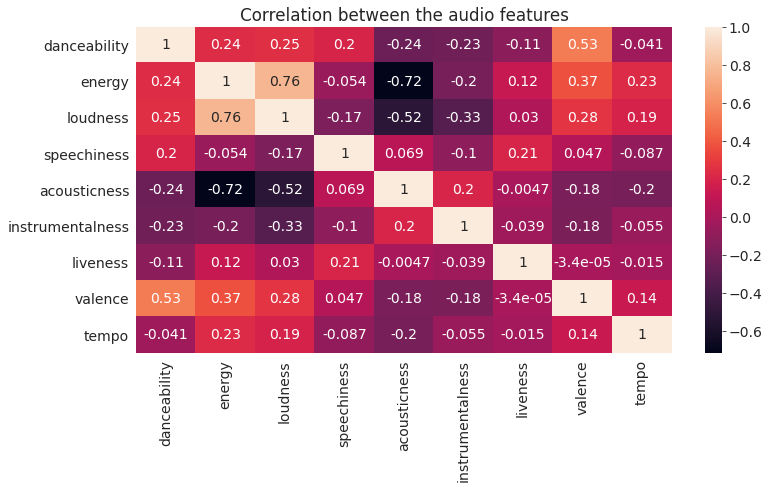

In [11]:
corr = tracks_df[['danceability', 
                  'energy', 
                  'loudness', 
                  'speechiness', 
                  'acousticness', 
                  'instrumentalness', 
                  'liveness',
                  'valence', 
                  'tempo' ]].corr()

plt.title('Correlation between the audio features')
sns.heatmap(corr, annot=True);

### Advisory label

Certain songs have parental advisory label associated with them indicating the song contains adult content which may not be suitable for children. Let's see how many songs in the dataset have advisory label associated with them.

In [12]:
tracks_df.explicit.value_counts()

0    560808
1     25864
Name: explicit, dtype: int64

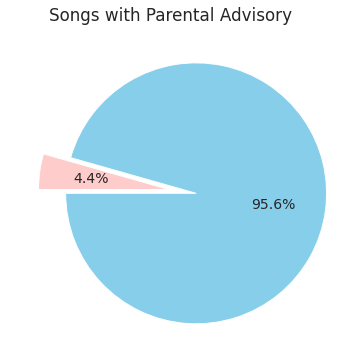

In [13]:
plt.title('Songs with Parental Advisory')
plt.pie(tracks_df.explicit.value_counts(), 
        explode=(0.2, 0.01), 
        colors=['skyblue','#ffcccc'], 
        autopct='%1.1f%%', 
        startangle=180);

Around `~4.4%` of songs in the dataset have parental advisory label associated with them.

### Release Date

In [14]:
px.scatter(tracks_df, x='release_date', y='popularity', title='Release Date vs. Popularity')

Output hidden; open in https://colab.research.google.com to view.

It can be observed from the graph that the songs released more recently have higher popularity. Note that this dataset only contains songs released upto `April 2021`. 

Let's save our work before continuing.

In [ ]:
jovian.commit()

## Preprocessing and Feature Engineering

We will look at the available columns, and figure out if we can create new columns or apply any useful transformations.

In [15]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

### Year

In [16]:
tracks_df['release_date'].sample(10)

280451          1954
318897    1994-01-01
467545    2003-01-01
570339          1954
38400     1964-01-01
367025    1996-08-09
567268    2000-12-18
305275    2020-05-15
65610     1992-01-01
392670    1982-01-01
Name: release_date, dtype: object

The `release_date` column of the data frame contains inconsistent data. In some of the cases it only contains the year value of the date. To keep the data consistent we will add a new column named `year` containing only the release year of the song.

In [17]:
def to_year(x):
    result = []
    x.to_string()
    for i in x:
        result.append(int(i[:4]))
    return result

tracks_df['year'] = to_year(tracks_df.release_date)

As the format of the date in `release_date` column is either `year-month-day` or `year`, we will extract the first 4 digits as year with the help of above function.

In [18]:
tracks_df['year'].sample(10)

491215    1988
436448    2010
365012    1990
526481    2002
436743    2012
374357    2020
398975    2017
79429     2018
429506    1973
269191    1985
Name: year, dtype: int64

Along with the `year` column we can also add information about how old the song is at present. For that we will find the max value of `year` and calculate it's difference with every other row.

In [19]:
max_year = tracks_df['year'].max()

In [20]:
tracks_df['years_old'] = max_year - tracks_df['year']

In [21]:
tracks_df['years_old'].sample(10)

560214     7
224465    34
563031    65
121726    86
92242      2
416956    63
297638    46
58044     37
418599    18
491004    37
Name: years_old, dtype: int64

### Tempo

In [22]:
tracks_df['tempo'].value_counts()

0.000      328
128.003     98
119.994     91
139.980     89
127.994     86
          ... 
185.442      1
170.351      1
122.670      1
55.513       1
144.505      1
Name: tempo, Length: 122706, dtype: int64

The `tempo` column contains many zero values. We will replace the zero values with the mean of all the other non-zero values in the dataset.

In [23]:
tracks_df.loc[tracks_df['tempo'] == 0 , 'tempo'] = tracks_df.loc[tracks_df['tempo'] > 0 , 'tempo'].mean()

In [24]:
tracks_df['tempo'].value_counts()

118.531126    328
128.003000     98
119.994000     91
139.980000     89
127.994000     86
             ... 
185.442000      1
170.351000      1
122.670000      1
61.106000       1
144.505000      1
Name: tempo, Length: 122706, dtype: int64

### Artists

The artist of the song can have a large impact on the popularity of the song. So we will add a new column `artist_popularity` containing the artist's mean popularity. For that we will also need the `mean` and `count` columns.

In [25]:
tracks_df['mean'] = tracks_df.groupby('artists')['popularity'].transform('mean')
tracks_df['count'] = tracks_df.groupby('artists')['popularity'].transform('count')

In [26]:
def get_artist_popularity(x, y):
  result = y.groupby(x.artists).agg(['mean', 'count'])
  result.loc[result['count'] <= 2, 'mean'] = y.mean()
  result.loc[result['count'] >= 600, 'mean'] = 0
  return result

The above function processes the artists column as follows:

*  Stores the artists mean popularity.
*  Replaces the data where artists appear less than `2` times with mean popularity.
*  Replaces the data where artists appear more than `600` times with `0`.

The above feature engineering idea has been taken from this [notebook](http://www.kaggle.com/anatpeled/spotify-popularity-prediction).

In [27]:
temp_df = tracks_df.drop('popularity', axis=1)
result_df = get_artist_popularity(temp_df, tracks_df['popularity'])['mean']
tracks_df['artist_popularity'] = np.where(tracks_df['artists'].isin(result_df.index), 
                                          tracks_df['artists'], 
                                          'unknown')
tracks_df['artist_popularity'] = tracks_df['artist_popularity'].map(result_df)

In [30]:
tracks_df[['artists', 'artist_popularity']].sample(10)

artists  artist_popularity
37724                                       ['Bob Dylan']          31.243070
308484       ['Cast of "Folk Og Røvere I Kardemomme By"']          21.285714
73411                                  ['Gustavo Cerati']          49.400000
200336                                 ['Vicente Garcia']          45.041667
135171           ['The Victor Orchestra', 'Nat Shilkret']           0.031250
584631                 ['Per Gessle', 'Helena Josefsson']          27.570053
501328  ['Johannes Brahms', 'Wilhelm Furtwängler', 'Wi...           0.000000
301688                          ['Dr. Dre', 'Snoop Dogg']          64.714286
261596                                            ['Hex']          16.733333
29816                    ['Kishore Kumar', 'Asha Bhosle']          19.616162

### Input and Target Columns

Let's select the columns that we will use for training.

In [31]:
tracks_df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'year', 'years_old',
       'mean', 'count', 'artist_popularity'],
      dtype='object')

In [32]:
input_columns = ['years_old', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 
                 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 
                 'liveness', 'valence', 'tempo', 'time_signature', 'artist_popularity']

target_column = 'popularity'

Let's also identify the numeric and categorical columns.

In [33]:
numeric_cols = ['years_old', 'duration_ms', 'explicit', 'danceability', 'energy', 
                'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 
                'liveness', 'valence', 'tempo', 'artist_popularity']
categorical_cols = ['key', 'time_signature']

Looking at the values of `key` and `time_signature` columns, it seems that using them as categorical columns would make more sense.

In [34]:
tracks_df['key'].value_counts()

0     74950
7     73779
2     66552
9     65128
5     53614
4     48220
1     41736
11    39132
10    37710
8     33460
6     30856
3     21535
Name: key, dtype: int64

In [35]:
tracks_df['time_signature'].value_counts()

4    503808
3     64523
5     11400
1      6604
0       337
Name: time_signature, dtype: int64

### Training, Validation and Test Split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
train_val_df, test_df = train_test_split(tracks_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [38]:
print('train_df', train_df.shape)
print('val_df', val_df.shape)
print('test_df', test_df.shape)

train_df (352002, 25)
val_df (117335, 25)
test_df (117335, 25)


In [39]:
train_inputs = train_df[input_columns].copy()
val_inputs = val_df[input_columns].copy()
test_inputs = test_df[input_columns].copy()

In [40]:
Y_train = train_df[target_column].copy()
Y_val = val_df[target_column].copy()
Y_test = test_df[target_column].copy()

### Imputing missing values

In [41]:
tracks_df[input_columns].isna().sum()

years_old            0
duration_ms          0
explicit             0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
artist_popularity    0
dtype: int64

We have no missing value in the dataset so we can move on to the next step.

### Scaling Numeric Values

Let's scale the numeric values in the 0 to 1 range.

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler().fit(tracks_df[numeric_cols])

In [44]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

The target is a numeric value in the range 0-100. We will also scale the target value to the 0-1 range.

In [45]:
Y_train = Y_train / 100
Y_val = Y_val / 100
Y_test = Y_test / 100

### Encoding Categorical Columns

In [46]:
from sklearn.preprocessing import OneHotEncoder

In [47]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(tracks_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))

In [48]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [49]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

## Linear Regression

Linear regression is a commonly used technique for solving regression problems. In a linear regression model, the target is modeled as a linear combination (or weighted sum) of input features. The predictions from the model are evaluated using a loss function like the Root Mean Squared Error (RMSE).

We will use Ridge Regression, a variant of linear regression that uses a technique called L2 regularization to introduce another loss term that forces the model to generalize better.

### Training

In [50]:
from sklearn.linear_model import Ridge

In [51]:
linear_model = Ridge()

In [52]:
linear_model.fit(X_train, Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

### Prediction

In [53]:
linear_train_predictions = linear_model.predict(X_train)

In [54]:
linear_train_predictions

array([0.2382466 , 0.33454942, 0.56792125, ..., 0.04601526, 0.46541006,
       0.37539489])

### Evaluation

In [55]:
from sklearn.metrics import mean_squared_error

In [56]:
train_rmse = mean_squared_error(linear_train_predictions, Y_train, squared=False)

In [57]:
print('The RMSE loss for training set is ', train_rmse)

The RMSE loss for training set is  0.11869256238860909


In [58]:
linear_val_predictions = linear_model.predict(X_val)
val_rmse = mean_squared_error(linear_val_predictions, Y_val, squared=False)
print('The RMSE loss for validation set is ', val_rmse)

The RMSE loss for validation set is  0.11880934110046901


In [59]:
linear_test_predictions = linear_model.predict(X_test)
test_rmse = mean_squared_error(linear_test_predictions, Y_test, squared=False)
print('The RMSE loss for test set is ', test_rmse)

The RMSE loss for test set is  0.11783782221260501


## Random Forest

Random Forest combines the results of several decision trees trained with slightly different parameters. The key idea here is that each decision tree in the forest will make different kinds of errors, and upon averaging, many of their errors will cancel out. This idea is also commonly known as the "wisdom of the crowd".

### Training

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
random_forest_model = RandomForestRegressor(n_jobs=-1, random_state=42)

In [62]:
random_forest_model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

### Prediction

In [63]:
random_forest_train_preds = random_forest_model.predict(X_train)
random_forest_train_preds

array([0.2692 , 0.2128 , 0.4946 , ..., 0.0655 , 0.423  , 0.37572])

In [64]:
train_rmse = mean_squared_error(random_forest_train_preds, Y_train, squared=False)
print('The RMSE loss for training set is ', train_rmse)

The RMSE loss for training set is  0.03816131456756738


In [65]:
random_forest_val_preds = random_forest_model.predict(X_val)
random_forest_val_preds

array([3.0130e-02, 3.4100e-02, 5.6460e-01, ..., 5.7665e-01, 4.3920e-01,
       3.0000e-04])

In [66]:
val_rmse = mean_squared_error(random_forest_val_preds, Y_val, squared=False)
print('The RMSE loss for validation set is ', val_rmse)

The RMSE loss for validation set is  0.0985493109542275


### Hyperparameter Tuning and Regularization

Let's define a helper function `test_params` which can evaluate the model for given values of hyperparamters.

In [67]:
def test_params(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(X_train, Y_train)
    train_rmse = mean_squared_error(model.predict(X_train), Y_train, squared=False)
    val_rmse = mean_squared_error(model.predict(X_val), Y_val, squared=False)
    return train_rmse, val_rmse

Let's also define a helper function to test and plot different values of a single parameter.

In [68]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

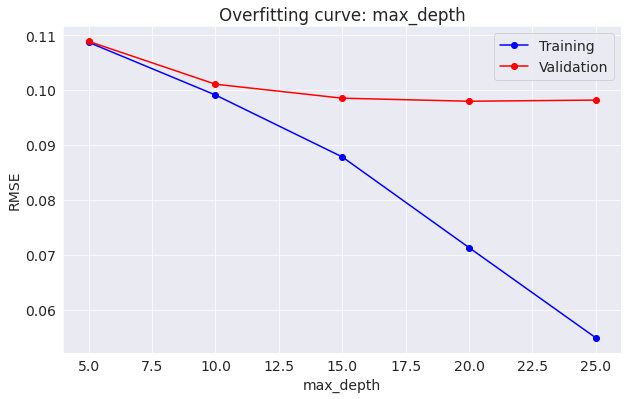

In [69]:
test_param_and_plot('max_depth', [5, 10, 15, 20, 25])

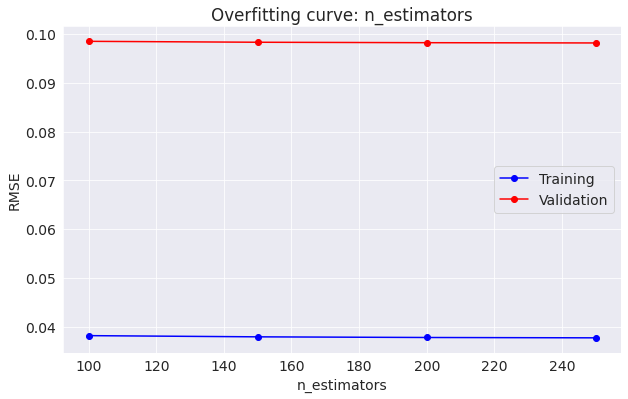

In [70]:
test_param_and_plot('n_estimators', [100, 150, 200, 250])

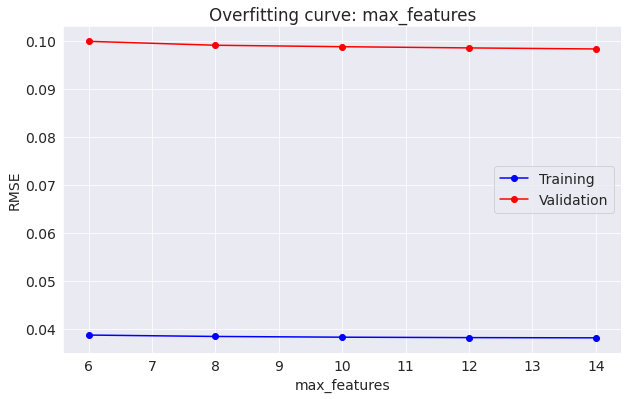

In [71]:
test_param_and_plot('max_features', [6, 8, 10, 12, 14])

### Evaluation

In [72]:
random_forest_model = RandomForestRegressor(n_jobs=-1, 
                                            random_state=42, 
                                            max_depth=15, 
                                            n_estimators=100, 
                                            max_features=10)
random_forest_model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [74]:
train_acc = random_forest_model.score(X_train, Y_train)
train_rmse = mean_squared_error(random_forest_model.predict(X_train), Y_train, squared=False)
print('The RMSE loss for training set is ', train_rmse, ' and accuracy is ', train_acc*100, '%')

The RMSE loss for training set is  0.08949642866541821  and accuracy is  76.32310537376918 %


In [75]:
val_acc = random_forest_model.score(X_val, Y_val)
val_rmse = mean_squared_error(random_forest_model.predict(X_val), Y_val, squared=False)
print('The RMSE loss for validation set is ', val_rmse, ' and accuracy is ', val_acc*100, '%')

The RMSE loss for validation set is  0.09923756195532543  and accuracy is  70.85634588193562 %


In [76]:
test_acc = random_forest_model.score(X_test, Y_test)
test_rmse = mean_squared_error(random_forest_model.predict(X_test), Y_test, squared=False)
print('The RMSE loss for test set is ', test_rmse, ' and accuracy is ', test_acc*100, '%')

The RMSE loss for test set is  0.09848852947939368  and accuracy is  71.01177622937989 %


#### Feature Importance

In [77]:
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': random_forest_model.feature_importances_
}).sort_values('importance', ascending=False)

In [78]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=feature_importance_df.head(10), x='importance', y='feature', palette='icefire');

## Gradient Boosting

Gradient Boosting Machine (GBM) works as follows:


1.   The average value of the target column and uses as an initial prediction every input.
2.  The residuals (difference) of the predictions with the targets are computed.
3.  A decision tree of limited depth is trained to predict just the residuals for each input.
4.  Predictions from the decision tree are scaled using a parameter called the learning rate (this prevents overfitting)
5.  Scaled predictions fro the tree are added to the previous predictions to obtain the new and improved predictions.
6.  Steps 2 to 5 are repeated to create new decision trees, each of which is trained to predict just the residuals from the previous prediction.



### Training

In [ ]:
!pip install xgboost --upgrade --quiet

In [80]:
from xgboost import XGBRegressor

In [81]:
gbm_model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [82]:
gbm_model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

### Prediction

In [83]:
gbm_train_preds = gbm_model.predict(X_train)
gbm_train_preds

array([0.22382605, 0.35105187, 0.5886918 , ..., 0.02703674, 0.4237026 ,
       0.36623526], dtype=float32)

In [84]:
train_rmse = mean_squared_error(gbm_train_preds, Y_train, squared=False)
print('The RMSE loss for training set is ', train_rmse)

The RMSE loss for training set is  0.1030407038841221


In [85]:
gbm_val_preds = gbm_model.predict(X_val)
gbm_val_preds

array([0.03452813, 0.0514764 , 0.47231337, ..., 0.4423982 , 0.4675226 ,
       0.01998455], dtype=float32)

In [86]:
val_rmse = mean_squared_error(gbm_val_preds, Y_val, squared=False)
print('The RMSE loss for validation set is ', val_rmse)

The RMSE loss for validation set is  0.10338607422749921


### Hyperparamter Tuning and Regularization

Let's update the `test_params` helper function with XGBRegressor model.

In [87]:
def test_params(**params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params).fit(X_train, Y_train)
    train_rmse = mean_squared_error(model.predict(X_train), Y_train, squared=False)
    val_rmse = mean_squared_error(model.predict(X_val), Y_val, squared=False)
    return train_rmse, val_rmse

In [88]:
test_param_and_plot('n_estimators', [1000, 1200, 1500])

Let's tune the value of `n_estimators` even further.

In [89]:
test_param_and_plot('n_estimators', [400, 600, 800])

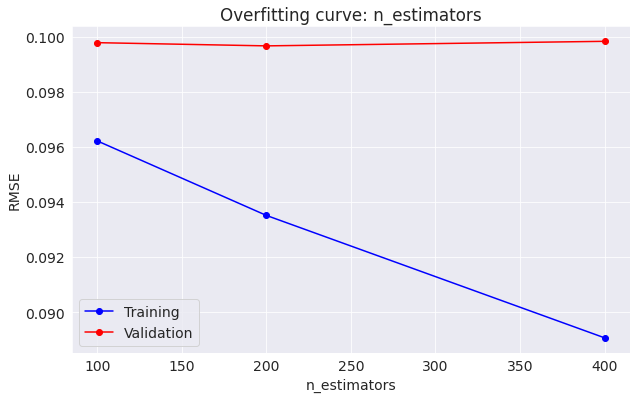

In [90]:
test_param_and_plot('n_estimators', [100, 200, 400])

In [92]:
test_param_and_plot('max_depth', [8, 10, 12, 14])

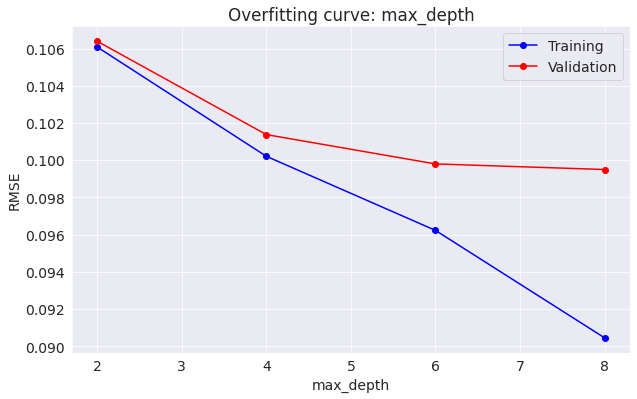

In [93]:
test_param_and_plot('max_depth', [2, 4, 6, 8])

We will test the `learning_rate` along with the tuned value of `n_estimators`.

In [94]:
def test_and_plot_learning_rate(param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {'learning_rate': value, 'n_estimators': 200}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + 'learning_rate')
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel('learning_rate')
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

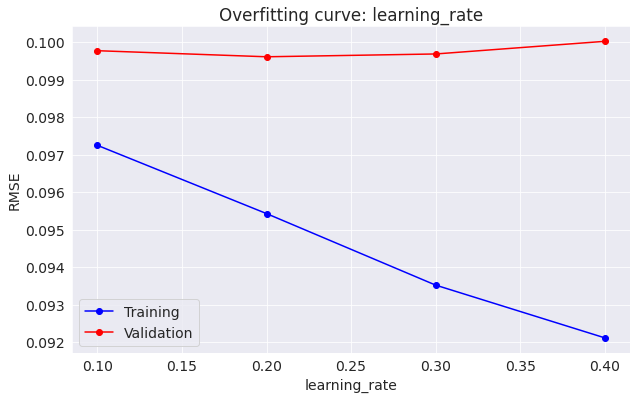

In [95]:
test_and_plot_learning_rate([0.1, 0.2, 0.3, 0.4])

### Evaluation

In [96]:
gbm_model = XGBRegressor(random_state=42, 
                         n_jobs=-1, 
                         n_estimators=200, 
                         max_depth=8, 
                         learning_rate=0.2)
gbm_model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [97]:
train_acc = gbm_model.score(X_train, Y_train)
train_rmse = mean_squared_error(gbm_model.predict(X_train), Y_train, squared=False)
print('The RMSE loss for training set is ', train_rmse, ' and accuracy is ', train_acc*100, '%')

The RMSE loss for training set is  0.0881456457592302  and accuracy is  77.03242948569432 %


In [98]:
val_acc = gbm_model.score(X_val, Y_val)
val_rmse = mean_squared_error(gbm_model.predict(X_val), Y_val, squared=False)
print('The RMSE loss for validation set is ', val_rmse, ' and accuracy is ', val_acc*100, '%')

The RMSE loss for validation set is  0.09907624298519543  and accuracy is  70.95101977146088 %


In [99]:
test_acc = gbm_model.score(X_test, Y_test)
test_rmse = mean_squared_error(gbm_model.predict(X_test), Y_test, squared=False)
print('The RMSE loss for test set is ', test_rmse, ' and accuracy is ', test_acc*100, '%')

The RMSE loss for test set is  0.09836366440351287  and accuracy is  71.08523295130684 %


#### Feature Importance

In [100]:
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': gbm_model.feature_importances_
}).sort_values('importance', ascending=False)

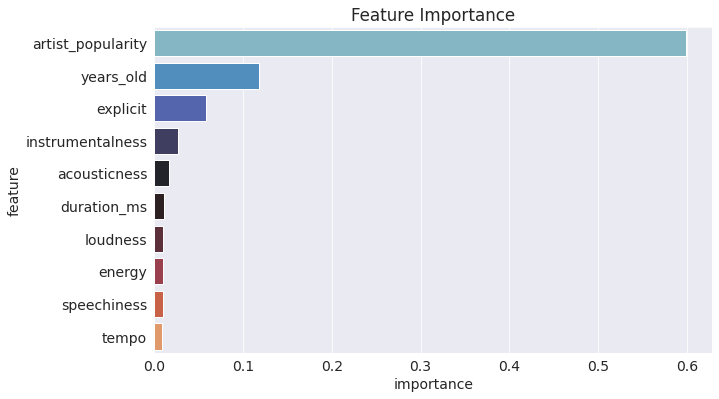

In [101]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=feature_importance_df.head(10), x='importance', y='feature', palette='icefire');

## Making Predictions

Now let's make predictions on a single input.

In [134]:
new_input = {
    'name' : 'Watermelon Sugar',
    'duration_ms' : 174000,
    'explicit' : 0,
    'artists'	: "['Harry Styles']",
    'release_date' : '2019',
    'danceability' : 0.548,
    'energy' : 0.816,
    'key' : 0,
    'loudness' : -4.209,
    'mode' : 1,
    'speechiness' : 0.0465,
    'acousticness' : 0.122,
    'instrumentalness' : 0.0,
    'liveness' : 0.335,
    'valence' : 0.557,
    'tempo' : 95.39,
    'time_signature' : 4
}

Let's declare the variables that we will need for preprocessing.

In [135]:
max_year = tracks_df['year'].max()
mean_tempo = tracks_df.loc[tracks_df['tempo'] > 0 , 'tempo'].mean()

In [141]:
def predict_input(model, single_input):
  input_df = pd.DataFrame([single_input])

  #Year
  input_df['year'] = to_year(input_df.release_date)
  input_df['years_old'] = max_year - input_df['year']

  #Tempo
  if input_df.tempo[0] == 0:
    input_df['tempo'] = mean_tempo
  
  #Artists
  flag = False
  for index in tracks_df.index:
    if tracks_df.loc[index]['artists'] == input_df.artists[0]:
      flag = True
      input_df['artist_popularity'] = tracks_df.loc[index]['artist_popularity']
      break
  
  if(flag == False):
    input_df['artist_popularity'] = tracks_df['popularity'].mean()

  #scaling and Encoding
  input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
  input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
  X_input = input_df[numeric_cols + encoded_cols]

  pred = model.predict(X_input)[0]
  pred = pred * 100
  return pred

In [142]:
print('Predicted popularity of the song is ', predict_input(gbm_model, new_input))

Predicted popularity of the song is  76.92539095878601


## Saving the Models

In [143]:
!pip install joblib --upgrade --quiet

In [144]:
import joblib

In [147]:
song_popularity_prediction = {
    'models' : {
      'linear' : linear_model,
      'random forest' : random_forest_model,
      'gradient boosting' : gbm_model
    },
    'scaler' : scaler,
    'encoder' : encoder,
    'input_cols' : input_columns,
    'target_col' : target_column,
    'numeric_cols' : numeric_cols,
    'categorical_cols' : categorical_cols,
    'encoded_cols' : encoded_cols,
    'functions' : {
      'to_year' : to_year,
      'get_artist_popularity' : get_artist_popularity,
      'predict_single_input' : predict_input
    }
}

In [148]:
joblib.dump(song_popularity_prediction, 'song_popularity_prediction.joblib')

['song_popularity_prediction.joblib']

## Conclusion

From the results we can conclude that tree based models are more suited for predicting the popularity of a song rather than linear models.

The feature importances of the models give us some insight on how the Spotify algorithm evaluates the popularity of the song. The major factors responsible in determining the popularity of the songs are as follows:
1.  The popularity of the song's artists.
2.  How old the song is currently.


### References

*  Spotify Dataset from https://www.kaggle.com/yamaerenay/datasets

*  Photo by [Fixelgraphy](https://unsplash.com/@fixelgraphy?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText) on [Unsplash](https://unsplash.com/)

*  [Exploratory Data Analysis on Spotify Dataset](https://jovian.ai/gohilbhagyaraj17/exploratory-data-analysis-on-spotify-dataset)

*  [Spotify Popularity Prediction](https://www.kaggle.com/anatpeled/spotify-popularity-prediction/notebook)

In [ ]:
jovian.commit()